In [1]:
! kaggle datasets download teamincribo/cyber-security-attacks
! unzip cyber-security-attacks.zip

Dataset URL: https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks
License(s): apache-2.0
cyber-security-attacks.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  cyber-security-attacks.zip
replace README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: README.md               
replace cybersecurity_attacks.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cybersecurity_attacks.csv  


# About Data

1. The dataset contains 25 columns, including:
  * Network Traffic Features
  * Security Analysis Features
  * User & Device information


2. Define the Goal:
  * Predict whether an attack will be logged, blocked, or ignored(Action Taken)
  * Predict 'Severity level'
  * Detect anomalies in network traffic

3. Preprocessing:
  * Convert categorical variables to numerical form
  * Handle missing values
  * Extract useful features

4. Choose a Model:
  * Classification Models(for 'Action Taken' or 'Severity Level')
    * Logistic Regression, Random Forest, XGBoost, Neural Networks
  * Anomaly Detection(for identifying suspicious traffic)
    * isolation Forest, One-Class SVM, autoencoders



# Preprocessing
1. Handling missing values
2. encode categorical variables
3. converting timestamp to features
4. feature selection & scaling



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the dataset (Change file path as needed)
file_path = '/content/cybersecurity_attacks.csv'  # Update with correct path
df = pd.read_csv(file_path)

# Sample a smaller subset for memory efficiency
df_sample = df

# Handle missing values
df_sample.fillna("Unknown", inplace=True)

# Convert categorical variables
categorical_cols = ['Protocol', 'Traffic Type', 'Severity Level']
df_sample = pd.get_dummies(df_sample, columns=categorical_cols, drop_first=True)

# Encode target variable ('Action Taken')
encoder = LabelEncoder()
df_sample['Action Taken'] = encoder.fit_transform(df_sample['Action Taken'])

# Convert Timestamp to datetime and extract features
df_sample['Timestamp'] = pd.to_datetime(df_sample['Timestamp'])
df_sample['Hour'] = df_sample['Timestamp'].dt.hour
df_sample['Day'] = df_sample['Timestamp'].dt.day
df_sample['Month'] = df_sample['Timestamp'].dt.month
df_sample['Year'] = df_sample['Timestamp'].dt.year
df_sample.drop(columns=['Timestamp'], inplace=True)

# Select relevant features
columns_to_keep = [
    'Source Port', 'Destination Port', 'Packet Length', 'Hour', 'Day', 'Month', 'Year',
    'Protocol_TCP', 'Protocol_UDP', 'Traffic Type_FTP', 'Traffic Type_HTTP', 'Severity Level_Low', 'Severity Level_Medium'
]
X = df_sample[columns_to_keep]
y = df_sample['Action Taken'].astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
df_sample.head()

,Source IP Address,Destination IP Address,Source Port,Destination Port,Packet Length,Packet Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,...,Protocol_TCP,Protocol_UDP,Traffic Type_FTP,Traffic Type_HTTP,Severity Level_Low,Severity Level_Medium,Hour,Day,Month,Year
0,103.216.15.12,84.9.164.252,31225,17616,503,Data,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,Unknown,...,False,False,False,True,True,False,6,30,5,2023
1,78.199.217.198,66.191.137.154,17245,48166,1174,Data,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,Unknown,...,False,False,False,True,True,False,7,26,8,2020
2,63.79.210.48,198.219.82.17,16811,53600,306,Control,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,...,False,True,False,True,True,False,8,13,11,2022
3,163.42.196.10,101.228.192.255,20018,32534,385,Data,Totam maxime beatae expedita explicabo porro l...,Unknown,15.79,Alert Triggered,...,False,True,False,True,False,True,10,2,7,2023
4,71.166.185.76,189.243.174.238,6131,26646,1462,Data,Odit nesciunt dolorem nisi iste iusto. Animi v...,Unknown,0.52,Alert Triggered,...,True,False,False,False,True,False,13,16,7,2023


# Classification Models

1. Define the Classification Problem
  * build models to predict 1) Action Taken 2) Severity Level
2. Prepare the Data
  * Features(X): All relevant network traffic attributes(ports, protocol, packet length, etc.)
  * Target(y): Action Taken(Encoded as 0=Ignored, 1=Logged, 2=Blocked)
  * Split the dataset into training(80%) and testig(20%) sets.
  * Train multiple models and compare their accuracy
3. Train Classification models
  * Logistic Regression(Baseline)
  * Random Forest(Good for feature importance)
  * XGBoost(High performance)

4. Evaluation
  * Accuracy score
  * Confusion matrix
  * Feature importance

# Precision, recall and F1-score
* Precision(Positive Predictive Value)
  * Measures how many of the predicted positive cases were actually correct.
  * When False Positive are costly.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:42:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model Performance:
Logistic Regression Accuracy: 0.3362
Random Forest Accuracy: 0.3377
XGBoost Accuracy: 0.3476


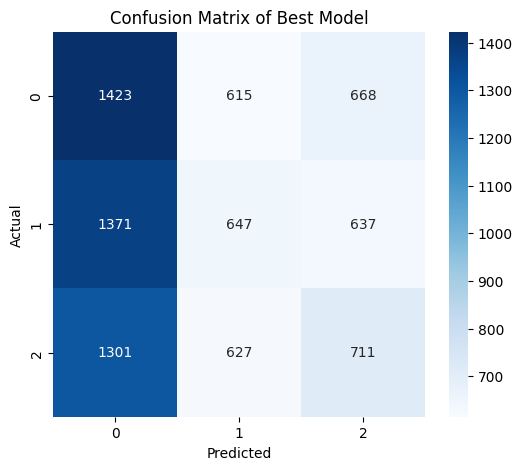


Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.35      0.53      0.42      2706
           1       0.34      0.24      0.28      2655
           2       0.35      0.27      0.31      2639

    accuracy                           0.35      8000
   macro avg       0.35      0.35      0.34      8000
weighted avg       0.35      0.35      0.34      8000



In [5]:
# Train Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

# Train XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=20, max_depth=3)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)

# Display Model Performance
print("\nModel Performance:")
print(f"Logistic Regression Accuracy: {log_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print(f"XGBoost Accuracy: {xgb_acc:.4f}")

# Confusion Matrix for Best Model
best_model = xgb_model if xgb_acc >= max(log_acc, rf_acc) else (rf_model if rf_acc >= log_acc else log_model)
y_pred_best = y_pred_xgb if best_model == xgb_model else (y_pred_rf if best_model == rf_model else y_pred_log)

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Best Model")
plt.show()

# Classification Report
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred_best))

1. Accuracy Analysis
  * Since accuracy is around 34%, this suggests that the model is not performing better than random guessing
  * The features may not be informative enough for proper classification
2, Confusion matrix analysis
  * significant misclassification is happening across all classes, meaning the model struggles to differentiate them.
3. Recall: The model is missing many true cases, especially for class 1
4. F1-score: A combination of precision and recall, indicating that none of the classes are being predicted well.

# Improvements for Classification Model
1. Feature Engineering
  * Check Feature Importance and remove unimportant ones
  * Generate new features
2. Handle Class Imbalance
  * Use SMOTE to balance the dataset.
3. Tune Hyperparameters
  * Perform GridSearchCV to optimize the best parameters for Random Forest and XGBoost


In [10]:
# Try feature selection methods to remove noise
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X,y)
selected_features = selector.get_support(indices=True)
print('Selected Feature Indices:', selected_features)

Selected Feature Indices: [ 0  1  2  3  4  5  8 10 11 12]


# SMOTE(synthetic Minority Over-sampling Technique Explained)

* SMOTE is a technique used to balance imbalanced datasets by creating synthetic samples of the minority class.
* It helps machine learning models learn better and avoid bias towards the majority class.
* SMOTE generates synthetic samples of the minority class instead of simply duplicating data.

## How SMOTE works
1. Finds the k-nearest neighbors
2. Randomly selects one of the nieghbors
3. Creates a new synthetic data point between the sample and the neighbor
4. Repeats until the minority class is balanced

## Purpose of Use
* To improve recall for the minority class

In [7]:
# Handle class imbalance
print(df_sample['Action Taken'].value_counts())

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Action Taken
0    13529
1    13276
2    13195
Name: count, dtype: int64


# GridSearchCV
* GridSearchCV is a hyperparameter tuning method in scikit-learn that automatically finds the best model parameters by testing multiple combinations.
## Why use GridSearchCV?
1. Hyperparameters(n_estimators in Random Forest, learning_rate in XGBoost) need to be optimized for best performance.
2. Instead of manually testing different values, GridSearchCV automates the process.
3. It trains and evaluates models on multiple hyperparameter settings to find the best combination.

## How GridSearchCV works?
1. Define a range of hyperparameters to test.
2. Train multiple models using all possible hyperparameter combinations.
3. Evaluate each model using cross-validation(splitting the data into multiple training/testing sets)
4. Select the best model based on performance metrics(e.g., accuracy, F1-score)

In [13]:
from sklearn.model_selection import GridSearchCV

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Perform hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# Perform hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

# Evaluate the tuned models
rf_acc = best_rf.score(X_test, y_test)
xgb_acc = best_xgb.score(X_test, y_test)

# Display results
model_performance = pd.DataFrame({
    "Model": ["Tuned Random Forest", "Tuned XGBoost"],
    "Accuracy": [rf_acc, xgb_acc]
})

print("\nImproved Classification Model Performance:")
print(model_performance)

# Save the best models
import joblib
joblib.dump(best_rf, "best_random_forest.pkl")
joblib.dump(best_xgb, "best_xgboost.pkl")

print("\nBest models saved as 'best_random_forest.pkl' and 'best_xgboost.pkl'.")$

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:10:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Improved Classification Model Performance:
                 Model  Accuracy
0  Tuned Random Forest  0.333457
1        Tuned XGBoost  0.337029

Best models saved as 'best_random_forest.pkl' and 'best_xgboost.pkl'.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47800 (\N{HANGUL SYLLABLE MOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

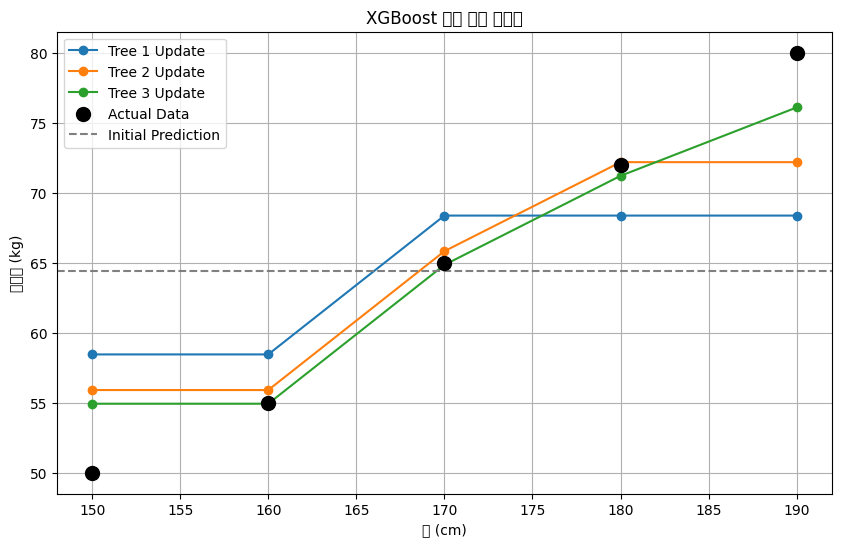

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor

# 1️⃣ 데이터 생성 (키 -> 몸무게 관계)
X = np.array([150, 160, 170, 180, 190]).reshape(-1, 1)  # 키(cm)
y = np.array([50, 55, 65, 72, 80])  # 몸무게(kg)

# 2️⃣ 초기 예측값 설정 (평균값 사용)
y_pred = np.full(y.shape, np.mean(y))  # 모든 값에 대해 평균을 초기 예측값으로 설정

# 학습률 설정
learning_rate = 0.5

# 3️⃣ 학습 과정 시각화를 위한 설정
plt.figure(figsize=(10, 6))

for i in range(3):  # 3개의 트리를 학습
    residuals = y - y_pred  # 현재 잔차(실제값 - 예측값)

    # 4️⃣ 작은 결정 트리(약한 학습기) 학습 (잔차를 예측)
    tree = DecisionTreeRegressor(max_depth=1)  # 단순한 트리 사용
    tree.fit(X, residuals)
    pred_residuals = tree.predict(X)  # 트리가 예측한 보정값

    # 5️⃣ 기존 예측값을 보정 (새 트리의 영향을 학습률을 고려하여 반영)
    y_pred += learning_rate * pred_residuals

    # 6️⃣ 그래프 시각화
    plt.plot(X, y_pred, label=f'Tree {i+1} Update', marker='o')

# 7️⃣ 실제 데이터 및 초기 예측값 플롯
plt.scatter(X, y, color='black', label='Actual Data', s=100, zorder=3)
plt.axhline(np.mean(y), color='gray', linestyle='--', label='Initial Prediction')

plt.xlabel("키 (cm)")
plt.ylabel("몸무게 (kg)")
plt.title("XGBoost 학습 과정 시각화")
plt.legend()
plt.grid(True)
plt.show()


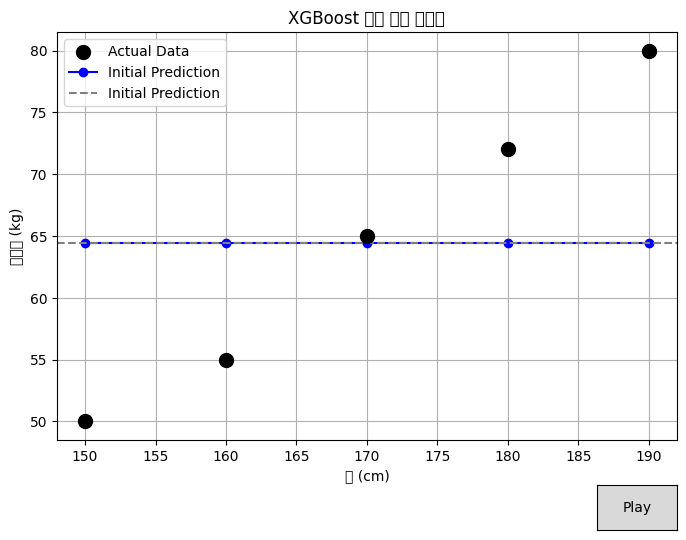

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from matplotlib.widgets import Button

# 1️⃣ 데이터 생성 (키 -> 몸무게 관계)
X = np.array([150, 160, 170, 180, 190]).reshape(-1, 1)  # 키(cm)
y = np.array([50, 55, 65, 72, 80])  # 몸무게(kg)

# 2️⃣ 초기 예측값 설정 (평균값 사용)
y_pred = np.full(y.shape, np.mean(y))  # 모든 값에 대해 평균을 초기 예측값으로 설정
learning_rate = 0.5
trees = []  # 학습한 트리를 저장할 리스트
step = 0  # 현재 스텝을 추적

# 3️⃣ Figure 및 Plot 초기 설정
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(bottom=0.2)  # 버튼을 위한 공간 확보

# 초기 그래프
scatter_actual = ax.scatter(X, y, color='black', label='Actual Data', s=100, zorder=3)
line_pred, = ax.plot(X, y_pred, 'bo-', label='Initial Prediction')

ax.axhline(np.mean(y), color='gray', linestyle='--', label='Initial Prediction')
ax.set_xlabel("키 (cm)")
ax.set_ylabel("몸무게 (kg)")
ax.set_title("XGBoost 학습 과정 시각화")
ax.legend()
ax.grid(True)

# 4️⃣ 버튼 추가 (Play 버튼)
ax_play = plt.axes([0.8, 0.05, 0.1, 0.075])  # 버튼 위치
button_play = Button(ax_play, 'Play')


def update(_):
    """ Play 버튼을 눌렀을 때 한 스텝씩 업데이트 """
    global step, y_pred

    if step < 3:  # 최대 3개의 트리 추가
        residuals = y - y_pred  # 현재 잔차(실제값 - 예측값)

        # 결정 트리(약한 학습기) 학습 (잔차를 예측)
        tree = DecisionTreeRegressor(max_depth=1)
        tree.fit(X, residuals)
        trees.append(tree)  # 트리 저장
        pred_residuals = tree.predict(X)  # 트리가 예측한 보정값

        # 예측값 업데이트
        y_pred += learning_rate * pred_residuals
        step += 1  # 스텝 증가

        # 그래프 업데이트
        line_pred.set_ydata(y_pred)
        ax.set_title(f"XGBoost 학습 과정 - Step {step}")

        # 그래프 다시 그리기
        plt.draw()


# 버튼 클릭 이벤트 연결
button_play.on_clicked(update)

# 그래프 표시
plt.show()



Anomaly Detection Results:
Isolation Forest Anomalies: 250
One-Class SVM Anomalies: 247


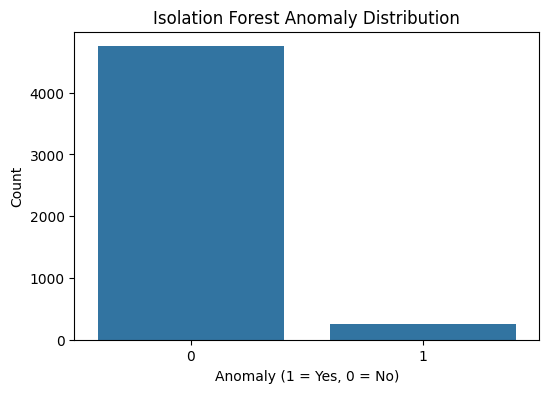

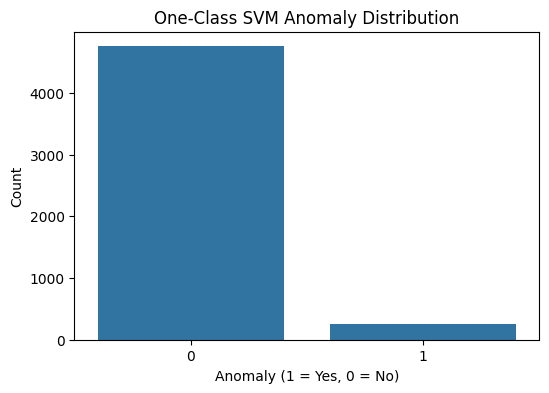

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt



# Sample a smaller subset for efficiency
df_sample = df.sample(n=min(5000, len(df)), random_state=42)

# Convert Timestamp to datetime and extract time-based features
df_sample['Timestamp'] = pd.to_datetime(df_sample['Timestamp'])
df_sample['Hour'] = df_sample['Timestamp'].dt.hour
df_sample['Day'] = df_sample['Timestamp'].dt.day
df_sample['Month'] = df_sample['Timestamp'].dt.month
df_sample['Year'] = df_sample['Timestamp'].dt.year
df_sample.drop(columns=['Timestamp'], inplace=True)

# Select numerical features for anomaly detection
features = ['Source Port', 'Destination Port', 'Packet Length', 'Hour', 'Day', 'Month', 'Year']
X_anomaly = df_sample[features]

# Standardize the data
scaler = StandardScaler()
X_anomaly_scaled = scaler.fit_transform(X_anomaly)

# Train Isolation Forest Model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_preds = iso_forest.fit_predict(X_anomaly_scaled)

# Train One-Class SVM Model
oc_svm = OneClassSVM(nu=0.05, kernel="rbf", gamma="scale")
svm_preds = oc_svm.fit_predict(X_anomaly_scaled)

# Convert predictions to anomaly labels (1 = normal, -1 = anomaly)
df_sample['IsolationForest_Anomaly'] = np.where(iso_preds == -1, 1, 0)
df_sample['OneClassSVM_Anomaly'] = np.where(svm_preds == -1, 1, 0)

# Count number of anomalies detected
print("\nAnomaly Detection Results:")
print("Isolation Forest Anomalies:", df_sample['IsolationForest_Anomaly'].sum())
print("One-Class SVM Anomalies:", df_sample['OneClassSVM_Anomaly'].sum())

# Plot anomaly distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df_sample['IsolationForest_Anomaly'])
plt.title("Isolation Forest Anomaly Distribution")
plt.xlabel("Anomaly (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=df_sample['OneClassSVM_Anomaly'])
plt.title("One-Class SVM Anomaly Distribution")
plt.xlabel("Anomaly (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()
